In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,f1_score
from sklearn.tree import DecisionTreeClassifier
import pickle
from IPython.display import FileLink

In [5]:
data=pd.read_csv(r"C:\Users\rohan\Downloads\Employee.csv")
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
data_test = pd.read_csv(r"C:\Users\rohan\Downloads\Employee.csv")
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [54]:
data.shape

(74498, 22)

In [55]:
data.info

<bound method DataFrame.info of        Age  Gender  Years at Company    Job Role  Monthly Income  \
0       31    Male                19   Education            5390   
1       59  Female                 4       Media            5534   
2       24  Female                10  Healthcare            8159   
3       36  Female                 7   Education            3989   
4       56    Male                41   Education            4821   
...    ...     ...               ...         ...             ...   
74493   56  Female                42  Healthcare            7830   
74494   30  Female                15   Education            3856   
74495   52    Male                 5   Education            5654   
74496   18    Male                 4   Education            5276   
74497   59  Female                47   Education            3774   

      Work-Life Balance Performance Rating  Number of Promotions Overtime  \
0             Excellent            Average                   2.0       No 

In [56]:
data.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Performance Rating', 'Number of Promotions',
       'Overtime', 'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [57]:
data.dtypes

Age                           int64
Gender                       object
Years at Company              int64
Job Role                     object
Monthly Income                int64
Work-Life Balance            object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home            int64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure                int64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
dtype: object

In [58]:
data.duplicated().sum()

np.int64(0)

In [59]:
data.nunique()

Age                           42
Gender                         2
Years at Company              47
Job Role                       5
Monthly Income              9778
Work-Life Balance              4
Performance Rating             4
Number of Promotions           5
Overtime                       2
Distance from Home            99
Education Level                5
Marital Status                 3
Number of Dependents           7
Job Level                      3
Company Size                   3
Company Tenure               127
Remote Work                    2
Leadership Opportunities       2
Innovation Opportunities       2
Company Reputation             4
Employee Recognition           4
Attrition                      2
dtype: int64

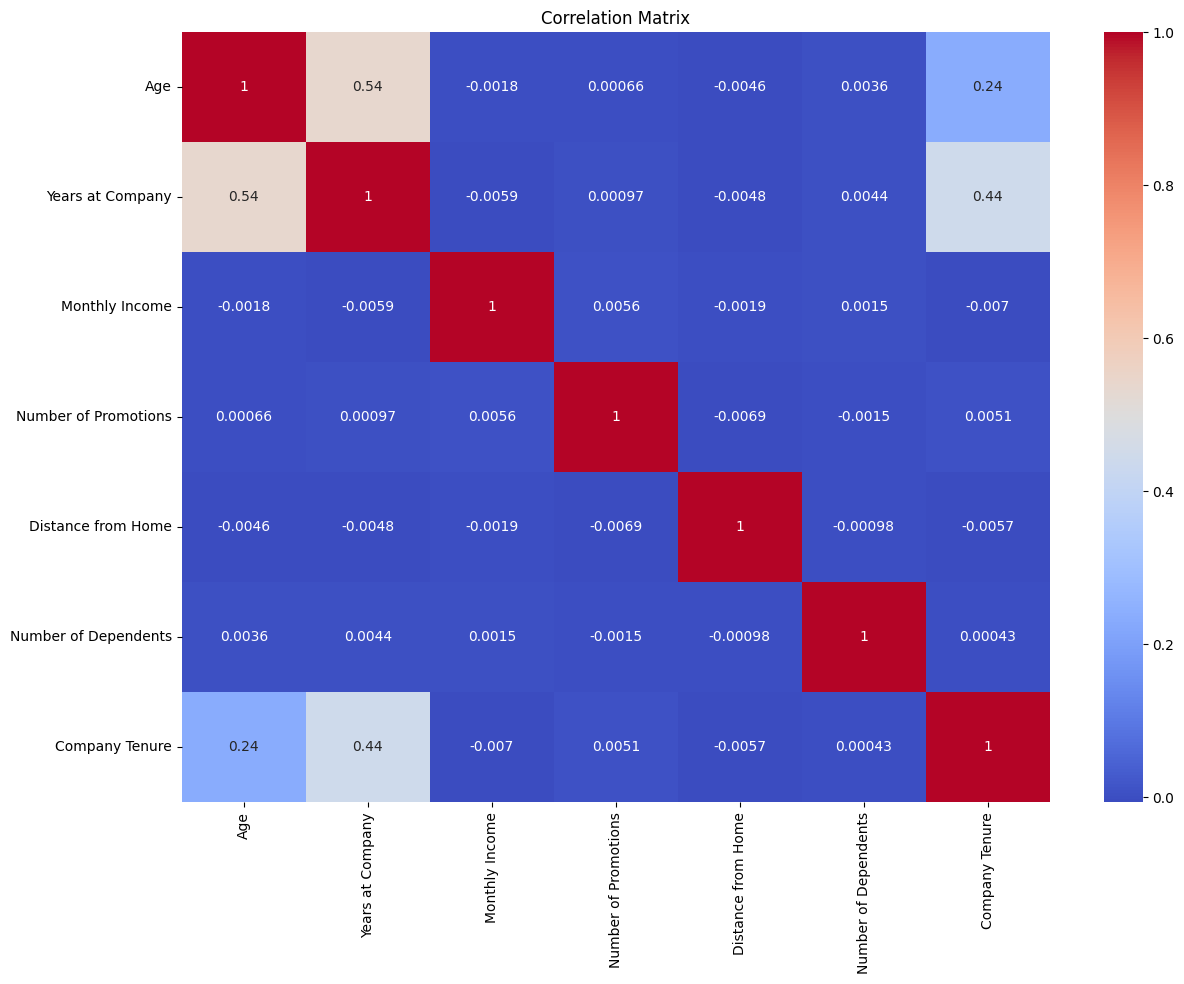

In [60]:
# Correlation Matrix
correlation_matrix = data.select_dtypes(include='number').corr()
plt.figure(figsize=(41,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

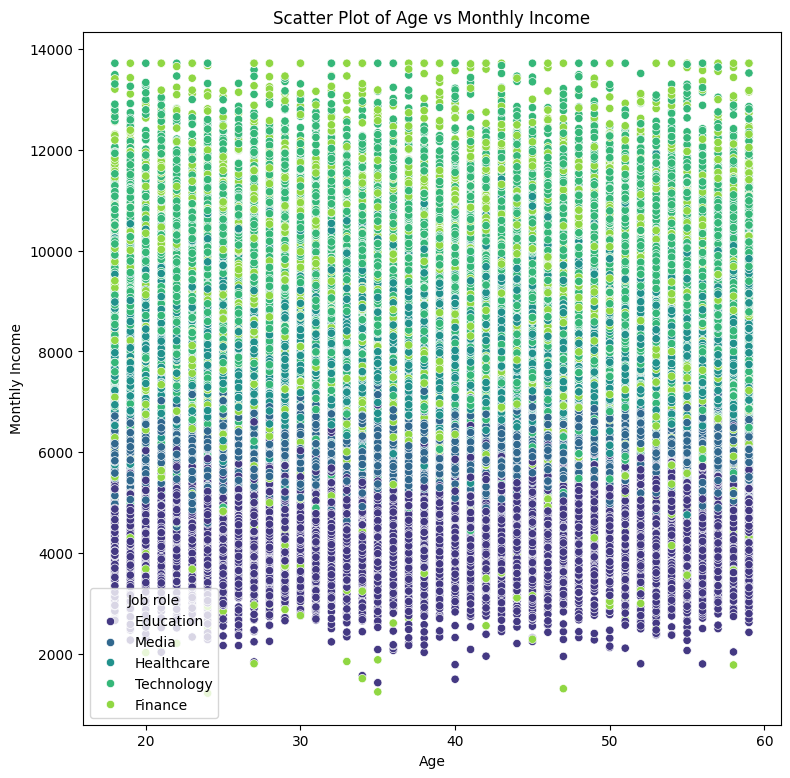

In [61]:
#scatter plot coloured based on Job Role
plt.figure(figsize=(9, 9))
sns.scatterplot(x='Age', y='Monthly Income', hue='Job Role', data=data, palette='viridis')
plt.title('Scatter Plot of Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Job role')
plt.show()

<Figure size 900x700 with 0 Axes>

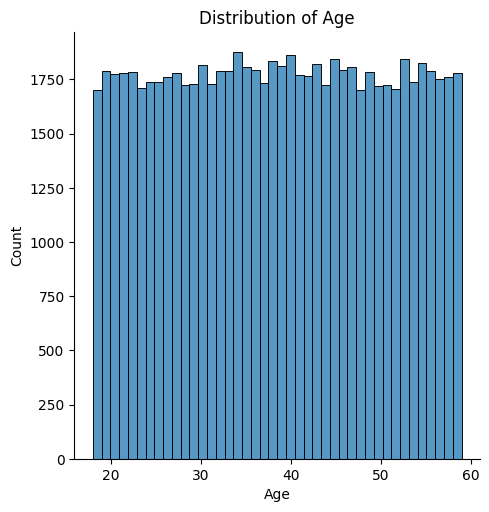

<Figure size 900x700 with 0 Axes>

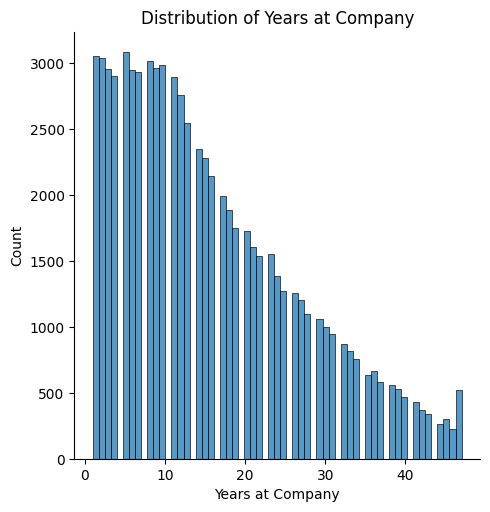

<Figure size 900x700 with 0 Axes>

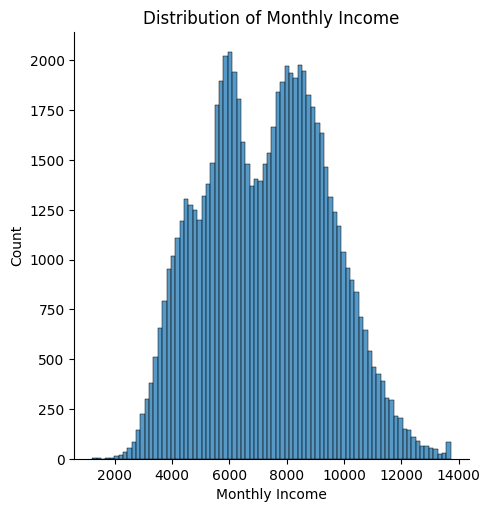

<Figure size 900x700 with 0 Axes>

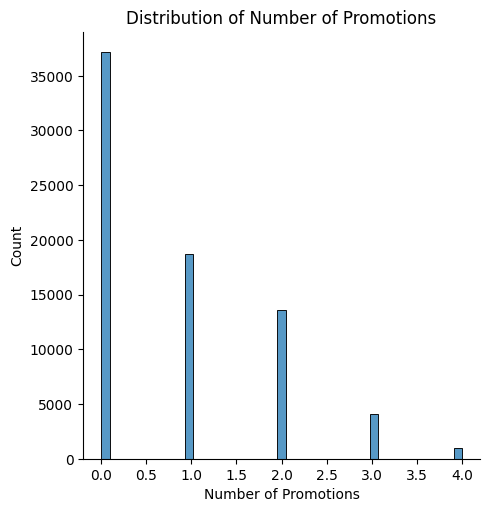

<Figure size 900x700 with 0 Axes>

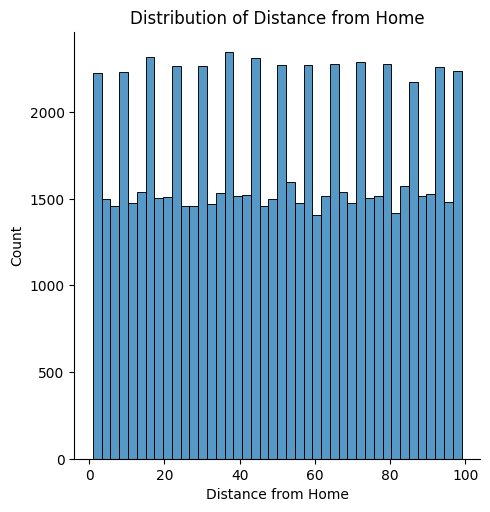

<Figure size 900x700 with 0 Axes>

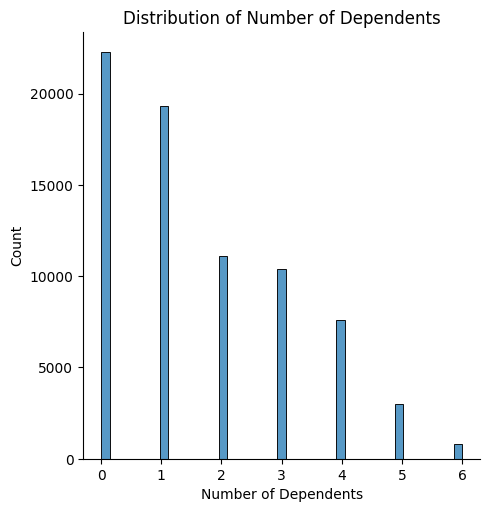

<Figure size 900x700 with 0 Axes>

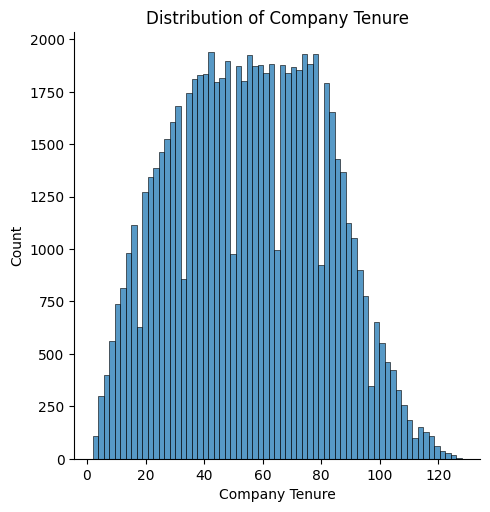

In [62]:
# Plot distribution plots for numerical columns
for col in data.select_dtypes(include='number'):
  plt.figure(figsize=(9, 7))
  sns.displot(data[col])
  plt.xlabel(col)
  plt.title(f'Distribution of {col}')
  plt.show()

In [63]:
#Preprossing

In [64]:
data.isna().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

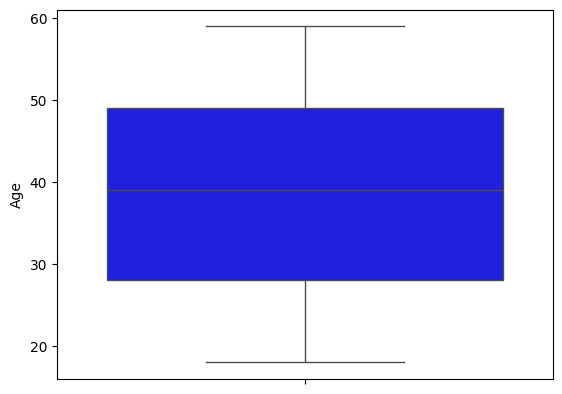

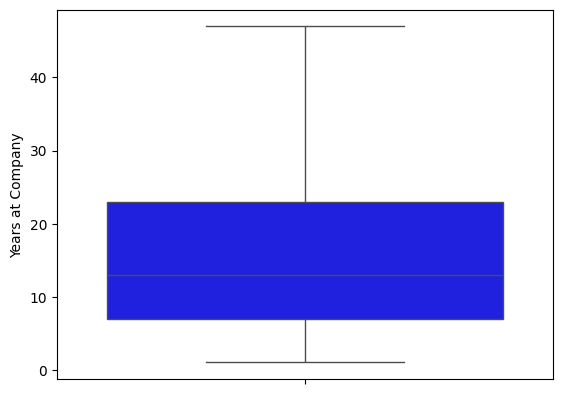

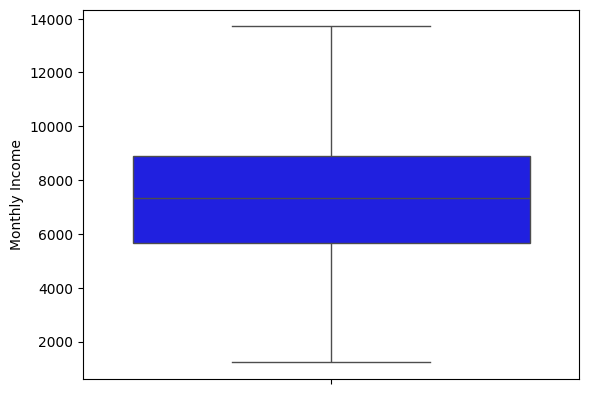

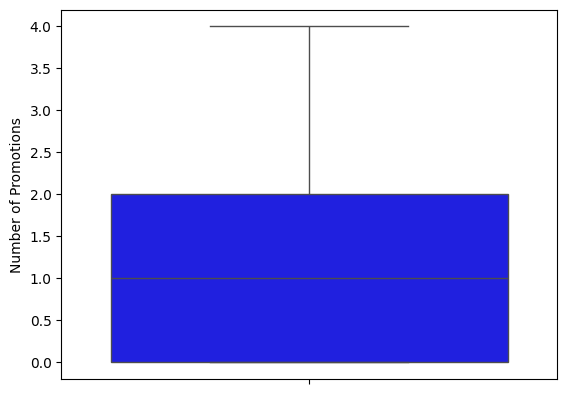

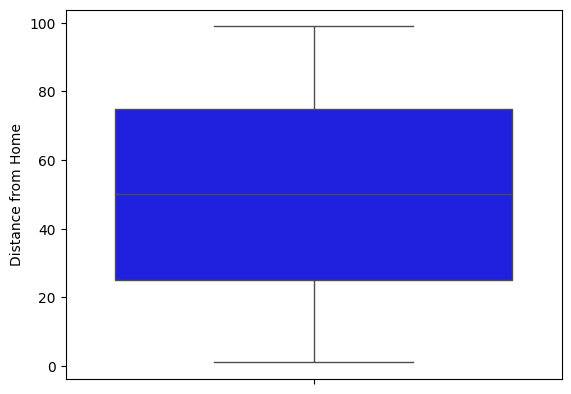

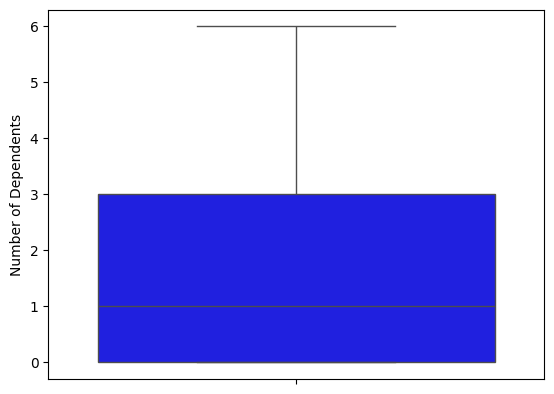

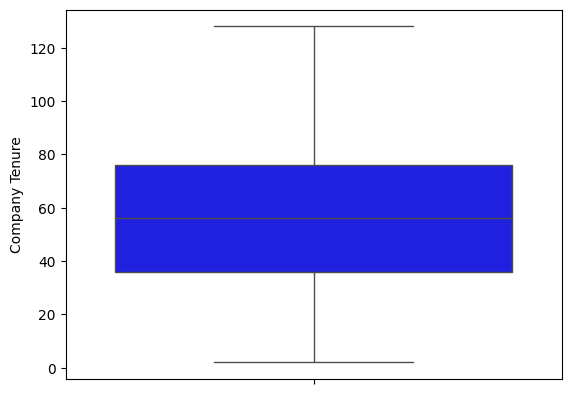

In [65]:
#Outliers
for i in data.select_dtypes(include=np.number):
    sns.boxplot(data[i], color='blue')
    plt.show()

In [66]:
# Clipping 
for col in data.select_dtypes(include='number'):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lb, ub)

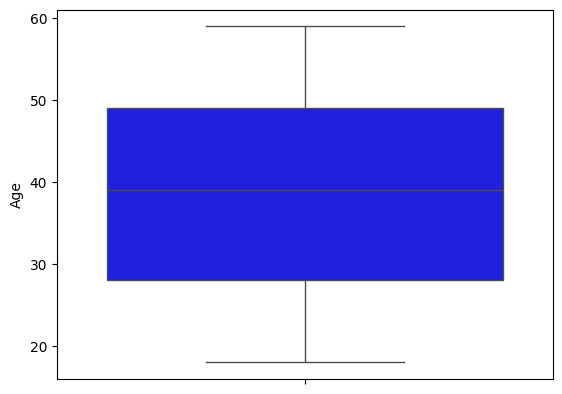

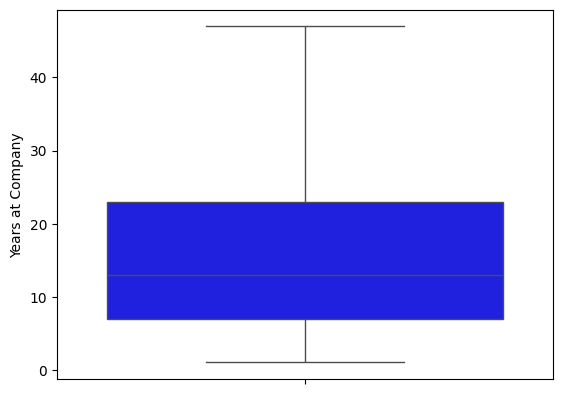

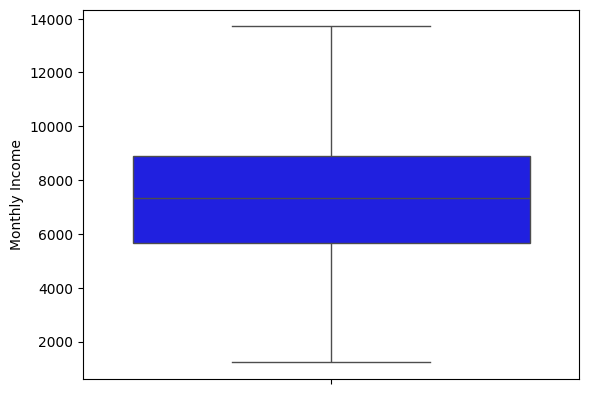

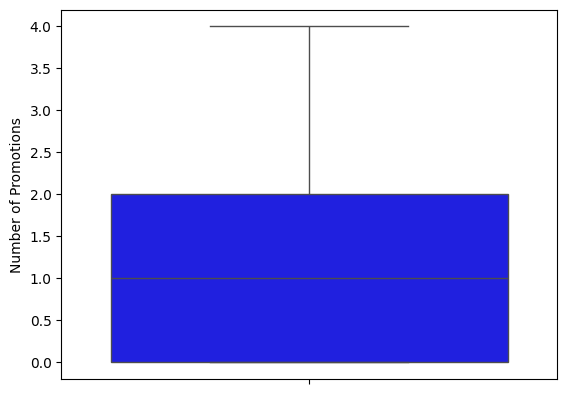

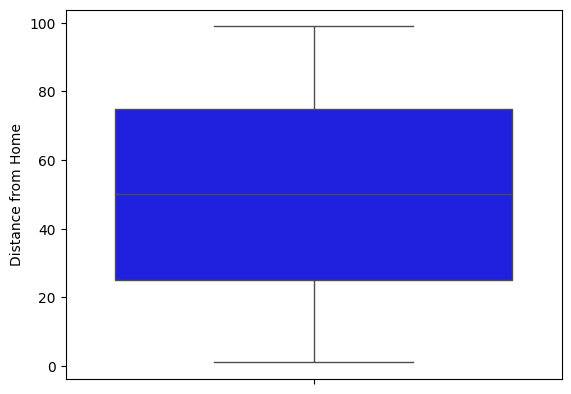

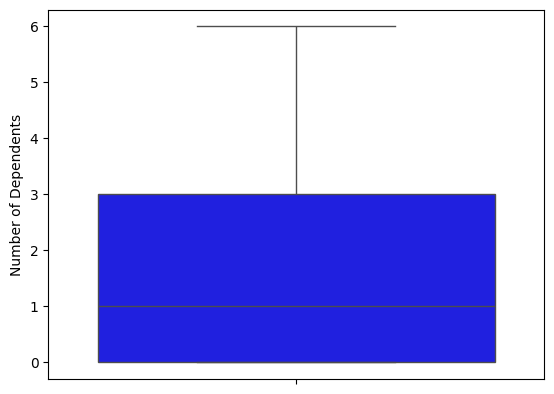

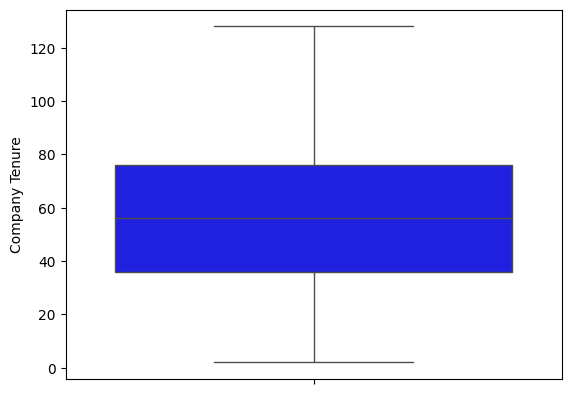

In [67]:
#Outliers
for i in data.select_dtypes(include=np.number):
    sns.boxplot(data[i], color='blue')
    plt.show()

In [76]:
#MinMax Scaler
scaler = MinMaxScaler()

for column in ['Age', 'Years at Company', 'Monthly Income','Number of Promotions','Number of Dependents']:
  data[column] = scaler.fit_transform(data[['Age', 'Years at Company', 'Monthly Income','Number of Promotions','Number of Dependents']])
print(data.head(3))

        Age  Gender  Years at Company    Job Role  Monthly Income  \
0  0.317073    Male          0.317073   Education        0.317073   
1  1.000000  Female          1.000000       Media        1.000000   
2  0.146341  Female          0.146341  Healthcare        0.146341   

  Work-Life Balance Performance Rating  Number of Promotions Overtime  \
0         Excellent            Average              0.317073       No   
1              Poor                Low              1.000000       No   
2              Good                Low              0.146341       No   

   Distance from Home  ... Number of Dependents Job Level  Company Size  \
0                  22  ...             0.317073       Mid        Medium   
1                  21  ...             1.000000       Mid        Medium   
2                  11  ...             0.146341       Mid        Medium   

  Company Tenure Remote Work  Leadership Opportunities  \
0             89          No                        No   
1            

In [82]:
#LabelEncoder
le = LabelEncoder()

for column in ['Gender', 'Job Role', 'Work-Life Balance','Job Satisfaction','Performance Rating','Overtime', 'Education Level','Marital Status','Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition']:
  data[column] = le.fit_transform(data[column])
print(data.head(3))

KeyError: 'Job Satisfaction'

In [84]:
data.head(3)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0.317073,1,0.317073,0,0.317073,0,Average,0.317073,No,22,...,0.317073,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,1.000000,0,1.000000,3,1.000000,3,Low,1.000000,No,21,...,1.000000,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,0.146341,0,0.146341,2,0.146341,2,Low,0.146341,No,11,...,0.146341,Mid,Medium,74,No,No,No,Poor,Low,Stayed


In [ ]:
#Train test split

In [85]:
X =data.drop(columns=['Attrition'])
y = data['Attrition']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59598, 21)
(59598,)
(14900, 21)
(14900,)


In [88]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'High'

In [90]:
#confusion matrix
conf_mat =confusion_matrix(y_test,y_predlr)
plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_predlr' is not defined